In [2]:
%load_ext autoreload
%autoreload 2
from classes import *
from loss import *
from mltools import *
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
############################ USPS DATA ######################################
uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
X_train_usps,Y_train_usps = load_usps(uspsdatatrain)
X_test_usps,Y_test_usps = load_usps(uspsdatatest)

In [4]:
X_train_usps_reshape = np.array(X_train_usps.reshape(len(X_train_usps), -1, 1))

X_train_usps_16_16 = X_train_usps.reshape((len(X_train_usps),16,16))

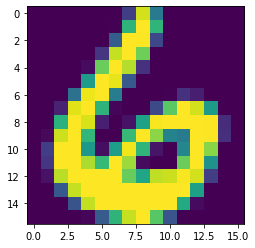

In [5]:
plt.imshow(X_train_usps_16_16[0])

In [6]:
X_train_usps_transpose = np.zeros((len(X_train_usps),16,16))

for ind in range(len(X_train_usps_reshape)):
    X_train_usps_transpose[ind] = X_train_usps_16_16[ind].T

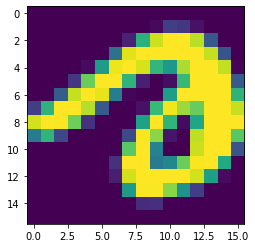

In [7]:
plt.imshow(X_train_usps_transpose[0])

In [8]:
X_train_usps_transpose = X_train_usps_transpose.reshape(len(X_train_usps_transpose),-1,1)

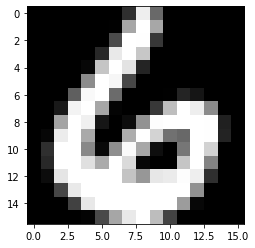

In [9]:
show_usps(X_train_usps_reshape[0])

In [10]:
np.sqrt(X_train_usps_reshape.shape[1])

16.0

In [11]:
x = X_train_usps_reshape.reshape(len(X_train_usps_reshape), int(np.sqrt(X_train_usps_reshape.shape[1])), int(np.sqrt(X_train_usps_reshape.shape[1])), 1)

In [14]:
conv1D2 = Conv1D_2(3,1,32,1)
conv1D = Conv1D(3,1,32,1)
maxpool = AvgPool1D(2,2)
f = Flatten()
linear = Linear(8128, 100)
r = ReLu()
linear2 = Linear(100, 10)

mse = MSELoss()
ce = CrossEntropyLogSoftmax()

X_train_usps_reshape = np.array(X_train_usps.reshape(len(X_train_usps), -1, 1))
X_test_usps_reshape = np.array(X_test_usps.reshape(len(X_test_usps), -1, 1))
one_hot_y_usps = one_hot(Y_train_usps)
one_hot_y_usps_test = one_hot(Y_test_usps)
seq = Sequential([conv1D2, maxpool, f, linear, r, linear2])


epochs = 5
eps = 10e-5

all_loss = BatchGD(seq, ce, X_train_usps_reshape[:10]/2, one_hot_y_usps[:10], epochs=epochs, eps=eps, verbose=False)

100%|██████████| 5/5 [00:00<?, ?it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

MiniBatchGD Epoch 1 :


	 Iteration 0 => Loss : 2.8991950710520507


	 Iteration 1 => Loss : 2.0003610576557698


	 Iteration 2 => Loss : 2.173470899622621


	 Iteration 3 => Loss : 2.3583024461628637


	 Iteration 4 => Loss : 2.1729436569756784


	 Iteration 5 => Loss : 1.7182458258301776


	 Iteration 6 => Loss : 1.9937837114939736


	 Iteration 7 => Loss : 1.8149856276510306


	 Iteration 8 => Loss : 2.1529515826770775


 20%|██        | 1/5 [03:44<14:57, 224.26s/it]

	 Iteration 9 => Loss : 2.3177960166581046
MiniBatchGD Epoch 2 :


	 Iteration 0 => Loss : 2.182393904138001


	 Iteration 1 => Loss : 2.0531514625106255


	 Iteration 2 => Loss : 1.2782956778818952


	 Iteration 3 => Loss : 1.9705130434309133


	 Iteration 4 => Loss : 1.912376487107726


	 Iteration 5 => Loss : 1.4069960915032382


	 Iteration 6 => Loss : 1.5913767525197062


	 Iteration 7 => Loss : 1.9524161459650233


	 Iteration 8 => Loss : 2.0030001624582736


 40%|████      | 2/5 [07:25<11:10, 223.50s/it]

	 Iteration 9 => Loss : 2.1319997106953865
MiniBatchGD Epoch 3 :


	 Iteration 0 => Loss : 2.353136354482859


	 Iteration 1 => Loss : 1.24855854502755


	 Iteration 2 => Loss : 1.272208577644685


	 Iteration 3 => Loss : 1.9277482472645213


	 Iteration 4 => Loss : 1.5131552389292795


	 Iteration 5 => Loss : 1.194962432215899


	 Iteration 6 => Loss : 1.346147296388407


	 Iteration 7 => Loss : 2.0662083796909143


	 Iteration 8 => Loss : 1.846216170518237


 60%|██████    | 3/5 [11:02<07:22, 221.27s/it]

	 Iteration 9 => Loss : 1.976886821479096
MiniBatchGD Epoch 4 :


	 Iteration 0 => Loss : 2.331513488012722


	 Iteration 1 => Loss : 0.9846144669015886


	 Iteration 2 => Loss : 1.435332212341303


	 Iteration 3 => Loss : 1.7976276680146783


	 Iteration 4 => Loss : 1.4854592173178092


	 Iteration 5 => Loss : 1.257371865334328


	 Iteration 6 => Loss : 1.2869860420661774


	 Iteration 7 => Loss : 2.292554360920896


	 Iteration 8 => Loss : 1.7031700414121849


 80%|████████  | 4/5 [14:26<03:36, 216.27s/it]

	 Iteration 9 => Loss : 1.8416325362437047
MiniBatchGD Epoch 5 :


	 Iteration 0 => Loss : 1.779402900444583


	 Iteration 1 => Loss : 0.8737791590287878


	 Iteration 2 => Loss : 1.395706104925893


	 Iteration 3 => Loss : 1.5719797787508945


	 Iteration 4 => Loss : 1.2846915877118528


	 Iteration 5 => Loss : 1.2938210865837574


	 Iteration 6 => Loss : 0.9004889227516173


	 Iteration 7 => Loss : 2.166978758868455


	 Iteration 8 => Loss : 1.8656631612967272


100%|██████████| 5/5 [17:49<00:00, 213.93s/it]

	 Iteration 9 => Loss : 1.3267384778173248


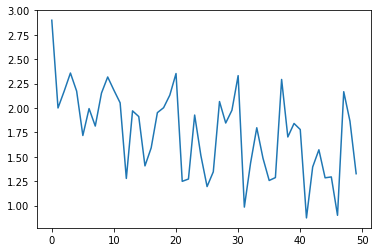

In [34]:
plt.plot(all_loss)

In [35]:
accuracy_argmax(X_test_usps[:100]/2, one_hot_y_usps[:100], seq)

0.78